In [1]:
##; Import libries 
import pandas as pd
import numpy as np
from __future__ import division

t  = 300             ##, temperature in K 
kb = 0.001982923700  ##; boltzman constat intk kcal/mol K  
beta = 1/(kb*t)      ##; beta value 
row, col = 20001,10       ##; 7000 is datapoint, 20 number trajs smd. 
T = kb*t

fname = "force_matrix.dat"
df = pd.read_csv(fname, sep="\t", header=None)
matrix_f = df.to_numpy()    ##; create an numpy matrix for Work
print(matrix_f)
df


[[-1.454398 -4.795203  0.467997 ... -2.030397  0.554398 -2.534402]
 [-1.682913 -5.934932 -0.90483  ... -1.496731 -2.347691 -1.965275]
 [ 0.020768 -5.722008  0.262114 ... -0.079935 -2.640416  0.727232]
 ...
 [-0.674924  2.890915 -0.100681 ...  2.071568  2.792674  5.172366]
 [ 0.766946  2.719628  1.283833 ...  0.781235  1.43747   4.013109]
 [ 2.647283  1.045314  1.614493 ...  3.215194  1.039033  0.794843]]


0         1         2         3         4         5         6  \
0     -1.454398 -4.795203  0.467997 -1.944003 -1.151999 -1.979997 -5.544003   
1     -1.682913 -5.934932 -0.904830 -0.839328 -2.373762 -2.104799 -3.333069   
2      0.020768 -5.722008  0.262114 -0.522524 -4.500549 -2.917900 -1.556034   
3      1.011459 -3.393600  2.275577 -2.783253 -2.024985 -2.421893 -2.055021   
4     -0.804238 -4.037745  1.170420 -3.087216 -0.460411 -3.083283 -0.219424   
...         ...       ...       ...       ...       ...       ...       ...   
19996  2.429559  3.118121 -2.653914 -1.964028 -1.758458  1.323464 -1.461285   
19997 -0.297738  3.484306 -2.591691 -2.452498 -0.941946 -0.998519 -0.174374   
19998 -0.674924  2.890915 -0.100681 -0.265802  0.035457 -2.854262  0.997469   
19999  0.766946  2.719628  1.283833  0.877674  0.259026  3.082113 -0.973722   
20000  2.647283  1.045314  1.614493 -1.319055  1.954041  3.187126  0.294574   

              7         8         9  
0     -2.030397  0.554398 -2.534402  
1     -1.496731 -2.347691 -1.965275  
2     -0.079935 -2.640416  0.727232  
3     -1.422112 -4.605937  0.741469  
4     -3.637823 -0.534492 -1.970179  
...         ...       ...       ...  
19996  1.110144  1.028928  0.954663  
19997  1.246548  0.954203  1.071826  
19998  2.071568  2.792674  5.172366  
19999  0.781235  1.437470  4.013109  
20000  3.215194  1.039033  0.794843  

[20001 rows x 10 columns]

In [2]:
###; calculate cummulative work: 
###; for make it you intergrate Force*v*dt 
###; where v and dt are velocity pulling and integration step. 
###; finally calculate cummulative work 

dt = 0.1   ##; can be derived from freq save values into tcl script e.i 50*0.002, tclfreq = 50 and 
v  = 0.01  ##; velocity pulling 
cum_work = np.cumsum((matrix_f*v*dt), axis=0) ##; cummulative work sum are by colum, axis=0 is column 
cum_work
inv_cum_work = -1*cum_work
df2 = pd.DataFrame(cum_work)
df2

0          1          2          3          4          5  \
0      -0.001454  -0.004795   0.000468  -0.001944  -0.001152  -0.001980   
1      -0.003137  -0.010730  -0.000437  -0.002783  -0.003526  -0.004085   
2      -0.003117  -0.016452  -0.000175  -0.003306  -0.008026  -0.007003   
3      -0.002105  -0.019846   0.002101  -0.006089  -0.010051  -0.009425   
4      -0.002909  -0.023883   0.003271  -0.009176  -0.010512  -0.012508   
...          ...        ...        ...        ...        ...        ...   
19996  22.875692  21.769173  23.688902  26.849148  21.590394  24.896593   
19997  22.875394  21.772657  23.686311  26.846695  21.589452  24.895595   
19998  22.874719  21.775548  23.686210  26.846429  21.589488  24.892740   
19999  22.875486  21.778268  23.687494  26.847307  21.589747  24.895823   
20000  22.878133  21.779313  23.689108  26.845988  21.591701  24.899010   

               6          7          8          9  
0      -0.005544  -0.002030   0.000554  -0.002534  
1      -0.008877  -0.003527  -0.001793  -0.004500  
2      -0.010433  -0.003607  -0.004434  -0.003772  
3      -0.012488  -0.005029  -0.009040  -0.003031  
4      -0.012708  -0.008667  -0.009574  -0.005001  
...          ...        ...        ...        ...  
19996  22.083268  24.294809  27.057518  23.777671  
19997  22.083094  24.296055  27.058473  23.778743  
19998  22.084091  24.298127  27.061265  23.783915  
19999  22.083118  24.298908  27.062703  23.787928  
20000  22.083412  24.302123  27.063742  23.788723  

[20001 rows x 10 columns]

In [22]:
###; Calculate work <w^2> and <w>^2
###; using matrix transformation 

###; calcuate <w^2> 
w1_square = np.zeros((row,col))
w1_square = np.square(cum_work)
w1_average = [] 
w1_average = w1_square.mean(axis=1)

###; calculate <w>^2
w2_average = []
w2_average = cum_work.mean(axis=1)
w2_average_squared = np.square(w2_average)

###; calculate <w> 
w0_average = []
w0_average = cum_work.mean(axis=1)

df3 = pd.DataFrame(w1_average)
df4 = pd.DataFrame(w2_average_squared)
df5 = pd.DataFrame(w0_average)
df5


0
0      -0.002041
1      -0.004340
2      -0.006032
3      -0.007500
4      -0.009167
...          ...
19996  23.888317
19997  23.888247
19998  23.889253
19999  23.890678
20000  23.892125

[20001 rows x 1 columns]

In [4]:
"""
    Function III: 
        In this last function we are going to reconstruct the PMF, through the iteration of the work
        values calculated before. 
        Equation: 
                PMF = <W> -1/2βσ^2,                                                  
                     where σ^2 is:  σ^2 = <W^2>-<W>^2.    
"""
diff_w1_w2 = []
zip_object = zip(w1_average, w2_average_squared)

for i,j in zip_object: 
    diff_w1_w2.append(i-j)

pmf_no_beta = []
pmf_with_beta= []

for i in range(len(w0_average)): 
    deltaG1 = w0_average[i]-(diff_w1_w2[i]) ##; original is (0.5*beta*diff_w1_w2[i]), it is 
    deltaG2 = w0_average[i]-(0.5*beta*diff_w1_w2[i])
    pmf_no_beta.append(deltaG1)
    pmf_with_beta.append(deltaG2)
    
#print(len(pmf))

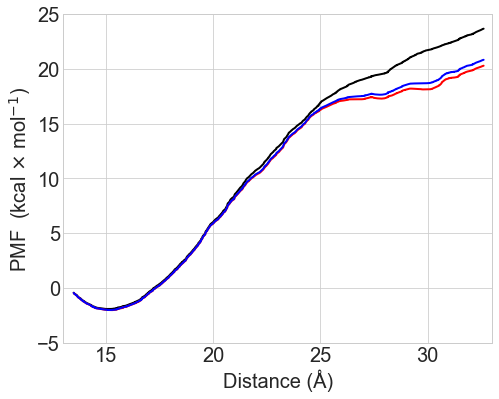

In [57]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')     #('bmh') ('seaborn-white')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 20

z = pd.read_csv("Z0.dat",header=None)

def smooth_rolling(x,y):
    """
    It for smooth curve similatry to tutorial with running average transformation
    with 500 windows. 
    """
    x = pd.DataFrame(x)
    y = pd.DataFrame(y)
    
    x1 = x.rolling(window=500).mean() 
    y1 = y.rolling(window=500).mean()
    return x1, y1 

z0, w0   = smooth_rolling(z, w0_average)
z0, pmf1 = smooth_rolling(z, pmf_no_beta)
z0, pmf2 = smooth_rolling(z, pmf_with_beta)

#width, height = plt.figaspect(1.68) ##; best to use 1.68 original 1920x1080
w = (1920/300)*1.20  
h = (1080/300)*1.68
fig = plt.figure(figsize=(w,h)) ##; use only 100 dpi to fit into screen

ax = plt.subplot()
ax.plot(z0, w0, color='black', linewidth=2) ##; multiply by -1 to convert a positive , each 500 elements. 
ax.plot(z0, pmf1, color='red', linewidth=2)
ax.plot(z0, pmf2,color='blue', linewidth=2)
plt.xlabel("Distance (Å)")
plt.ylabel("PMF " + r" (kcal $\times$ mol$^{-1}$)")
plt.ylim(-5, 25)
plt.xlim(13,33)

plt.savefig("pmf1.tiff", bbox_inches='tight', dpi=1000)

In [ ]:
w0_average

In [4]:
class x:
    def __init__(self) -> None:
         pass 
    def sum(self):
         x = 1
         retrn x+9
class N(x):
    def __init__(self) -> None:
          super().__init__() 
    def f(self):
     return super().sum()


x = N()
x.f() 

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)